In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import sklearn
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [27]:
df=pd.read_csv('experience_salary.csv')

In [28]:
df

,Years_Experience,Salary_Thousands
0,1.00,38.48
1,1.19,36.87
2,1.39,42.35
3,1.58,48.29
4,1.78,41.06
...,...,...
145,29.22,265.68
146,29.42,257.14
147,29.61,258.28
148,29.81,269.05


In [29]:
def decimal_to_year_month_rounded(decimal_years):
    years = int(decimal_years)
    months = round((decimal_years - years) * 12)  # months
    return round(years + months / 12, 1)

df['ExperienceDecimal'] = df['Years_Experience'].apply(decimal_to_year_month_rounded)

print(df)

     Years_Experience  Salary_Thousands  ExperienceDecimal
0                1.00             38.48                1.0
1                1.19             36.87                1.2
2                1.39             42.35                1.4
3                1.58             48.29                1.6
4                1.78             41.06                1.8
..                ...               ...                ...
145             29.22            265.68               29.2
146             29.42            257.14               29.4
147             29.61            258.28               29.6
148             29.81            269.05               29.8
149             30.00            269.48               30.0

[150 rows x 3 columns]


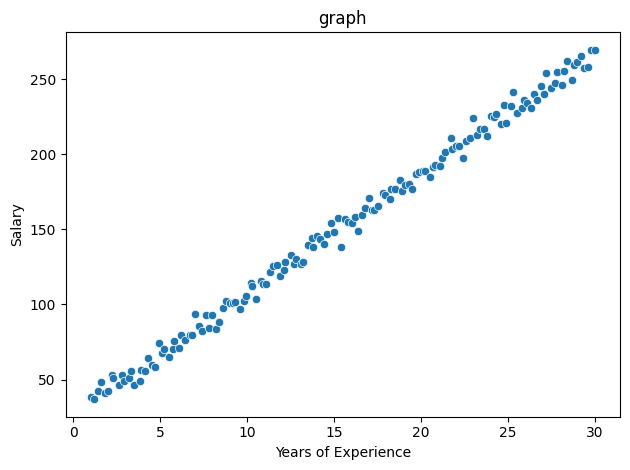

In [30]:
sns.scatterplot(data=df, x='ExperienceDecimal', y='Salary_Thousands')

plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("graph")

plt.tight_layout()
plt.show()


In [52]:
X=df.iloc[:,2:3]
y=df.iloc[:,-2]

In [53]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [54]:
lr=LinearRegression()
lr.fit(X_train,y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [55]:
X_test.shape

(30, 1)

In [56]:
X_train.shape

(120, 1)

In [57]:
y_test

6       53.24
3       48.29
113    224.26
12      55.89
24      70.65
129    234.34
25      75.48
108    205.45
128    235.80
45     102.47
48     112.46
42     100.82
35      84.39
5       42.61
85     165.84
54     125.24
41     100.70
96     186.96
144    261.51
89     177.14
77     154.40
74     138.12
115    216.57
94     180.40
87     173.11
29      79.70
2       42.35
127    230.91
44      97.12
125    241.58
Name: Salary_Thousands, dtype: float64

In [58]:
predicted_salary=lr.predict(X_test)
predicted_salary


array([ 44.65473433,  39.8408647 , 211.53554817,  53.48016199,
        72.73564051, 236.40720793,  73.53795211, 203.51243212,
       234.80258472, 105.63041631, 109.64197434, 100.81654668,
        89.58418421,  43.05011112, 167.4084099 , 119.2697136 ,
        99.21192347, 185.05926521, 259.67424447, 173.82690274,
       155.37373582, 150.55986619, 214.74479459, 181.85001879,
       170.61765632,  80.75875656,  38.23624149, 234.00027311,
       104.0257931 , 229.98871509])

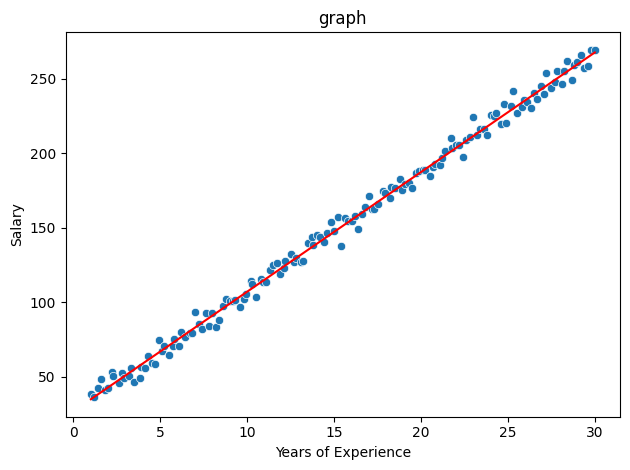

In [59]:
sns.scatterplot(data=df, x='ExperienceDecimal', y='Salary_Thousands')
plt.plot(X,lr.predict(X), color="r")


plt.xlabel("Years of Experience")
plt.ylabel("Salary")
plt.title("graph")

plt.tight_layout()
plt.show()


In [60]:
mae=mean_absolute_error(y_test,predicted_salary)
print("Mean absolute error:", mae)

Mean absolute error: 3.8277385802004833


In [61]:
mse=mean_squared_error(y_test,predicted_salary)
print("Mean squared error:", mse)

Mean squared error: 27.01079997063814


In [62]:
rmse=np.sqrt(mse)
rmse

np.float64(5.197191546464123)

In [63]:
r2_s=r2_score(y_test, predicted_salary)
print("r2_square:", r2_s)

r2_square: 0.9942485227900975
